In [1]:
import pandas as pd
import yaml
root_path = '/local/work/merengelke/aipal/'
config = yaml.load(open('cfg.yaml', 'r'), Loader=yaml.FullLoader)

cities_countries = config['cities_countries']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
if config['is_adult']:
    df = df[df['age'] > 18]
else:
    df = df[df['age'] <= 18]
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True)
features = config['feature_columns']

In [2]:
# All samples
df[features].describe().round(2)

,Fibrinogen_g_L,MCV_fL,Monocytes_percent,LDH_UI_L,PT_percent,MCHC_g_L,Lymphocytes_G_L,age,Monocytes_G_L,Platelets_G_L
count,1065.00,1200.00,1118.00,1160.00,1182.00,1198.00,1127.00,1201.00,1118.00,1201.00
mean,227.07,92.95,17.56,689.23,76.69,83.89,7.02,54.29,7.06,72.27
std,230.98,9.08,33.58,870.82,21.10,114.42,23.35,18.41,23.76,99.52
min,0.05,26.30,0.00,36.00,0.00,3.00,0.00,18.08,0.00,1.15
25%,4.05,87.00,1.99,261.00,65.00,33.00,0.90,40.00,0.10,22.00
50%,200.00,91.95,6.90,431.50,76.59,34.10,1.80,57.00,0.46,43.00
75%,389.20,98.72,23.85,779.00,88.00,36.00,4.55,69.00,2.70,91.80
max,2743.00,125.00,850.00,11396.00,205.00,389.00,322.74,97.00,225.58,2146.00


In [3]:
# AML samples
df[df['class'] == 'AML'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,752.00,751.00,734.00,723.00,750.00,752.00,629.00,696.00,752.00,701.00,696.00,752.00,752.00,752.00
mean,59.26,95.32,76.67,651.84,89.69,38.48,265.84,9.34,80.90,6.41,21.35,0.23,0.74,0.03
std,16.77,9.13,18.73,773.86,119.42,64.77,231.52,27.65,113.06,18.63,39.31,0.24,0.26,0.07
min,18.74,56.00,0.92,36.00,3.00,0.02,0.96,0.00,2.00,0.00,0.00,0.00,0.01,0.00
25%,48.00,89.00,65.00,246.00,32.80,2.86,4.61,0.11,25.75,1.04,2.38,0.05,0.58,0.01
50%,62.00,95.20,77.00,429.00,34.00,10.90,279.00,0.74,48.50,2.02,10.00,0.13,0.84,0.01
75%,72.00,101.30,87.07,775.50,35.50,45.14,434.00,4.26,104.00,5.11,31.68,0.35,0.94,0.03
max,92.00,125.00,140.00,11396.00,389.00,556.44,904.00,225.58,2146.00,224.00,850.00,0.97,0.99,0.68


In [4]:
# ALL samples
df[df['class'] == 'ALL'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,202.00,202.00,202.00,200.00,201.00,202.00,189.00,195.00,202.00,196.00,195.00,202.00,202.00,202.00
mean,44.74,88.25,78.66,1029.14,80.94,57.35,270.51,5.18,74.12,15.01,8.02,0.52,0.45,0.03
std,18.46,6.55,21.60,1311.60,112.08,99.67,273.30,20.62,87.61,42.29,11.32,0.30,0.30,0.07
min,18.08,72.40,0.00,78.00,26.00,0.66,0.64,0.00,1.15,0.00,0.00,0.02,0.01,0.00
25%,27.00,83.72,68.00,365.00,32.90,4.46,6.04,0.10,19.00,1.18,1.05,0.28,0.16,0.01
50%,44.09,87.15,79.00,607.50,34.00,14.24,272.00,0.43,40.00,2.65,3.23,0.49,0.44,0.01
75%,61.00,91.28,93.00,1070.75,35.00,57.25,391.00,1.91,96.75,7.06,9.35,0.80,0.68,0.03
max,87.00,114.20,143.00,10248.00,373.00,673.18,2743.00,217.05,523.00,322.74,52.49,0.98,0.97,0.53


In [5]:
# APL samples
df[df['class'] == 'APL'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,247.00,247.00,246.00,237.00,247.00,247.00,247.00,227.00,247.00,230.00,227.00,247.00,247.00,247.00
mean,46.94,89.58,75.13,516.46,68.69,14.66,95.11,1.65,44.49,2.04,14.12,0.35,0.44,0.21
std,17.63,8.10,26.62,556.14,98.59,26.51,118.57,5.11,44.88,4.00,23.98,0.27,0.27,0.25
min,19.00,26.30,0.00,111.00,28.20,0.30,0.05,0.00,2.00,0.16,0.00,0.01,0.02,0.00
25%,31.50,85.90,60.25,253.00,34.10,1.33,1.41,0.06,15.50,0.54,1.34,0.10,0.20,0.03
50%,47.00,89.00,70.00,356.00,35.30,3.42,9.22,0.20,28.00,0.98,5.00,0.31,0.38,0.09
75%,60.28,93.70,84.50,583.00,36.30,16.20,166.20,0.78,57.00,1.95,15.23,0.58,0.68,0.32
max,97.00,114.60,205.00,6249.00,371.00,205.80,495.00,44.84,275.00,45.00,240.00,0.97,0.97,0.94


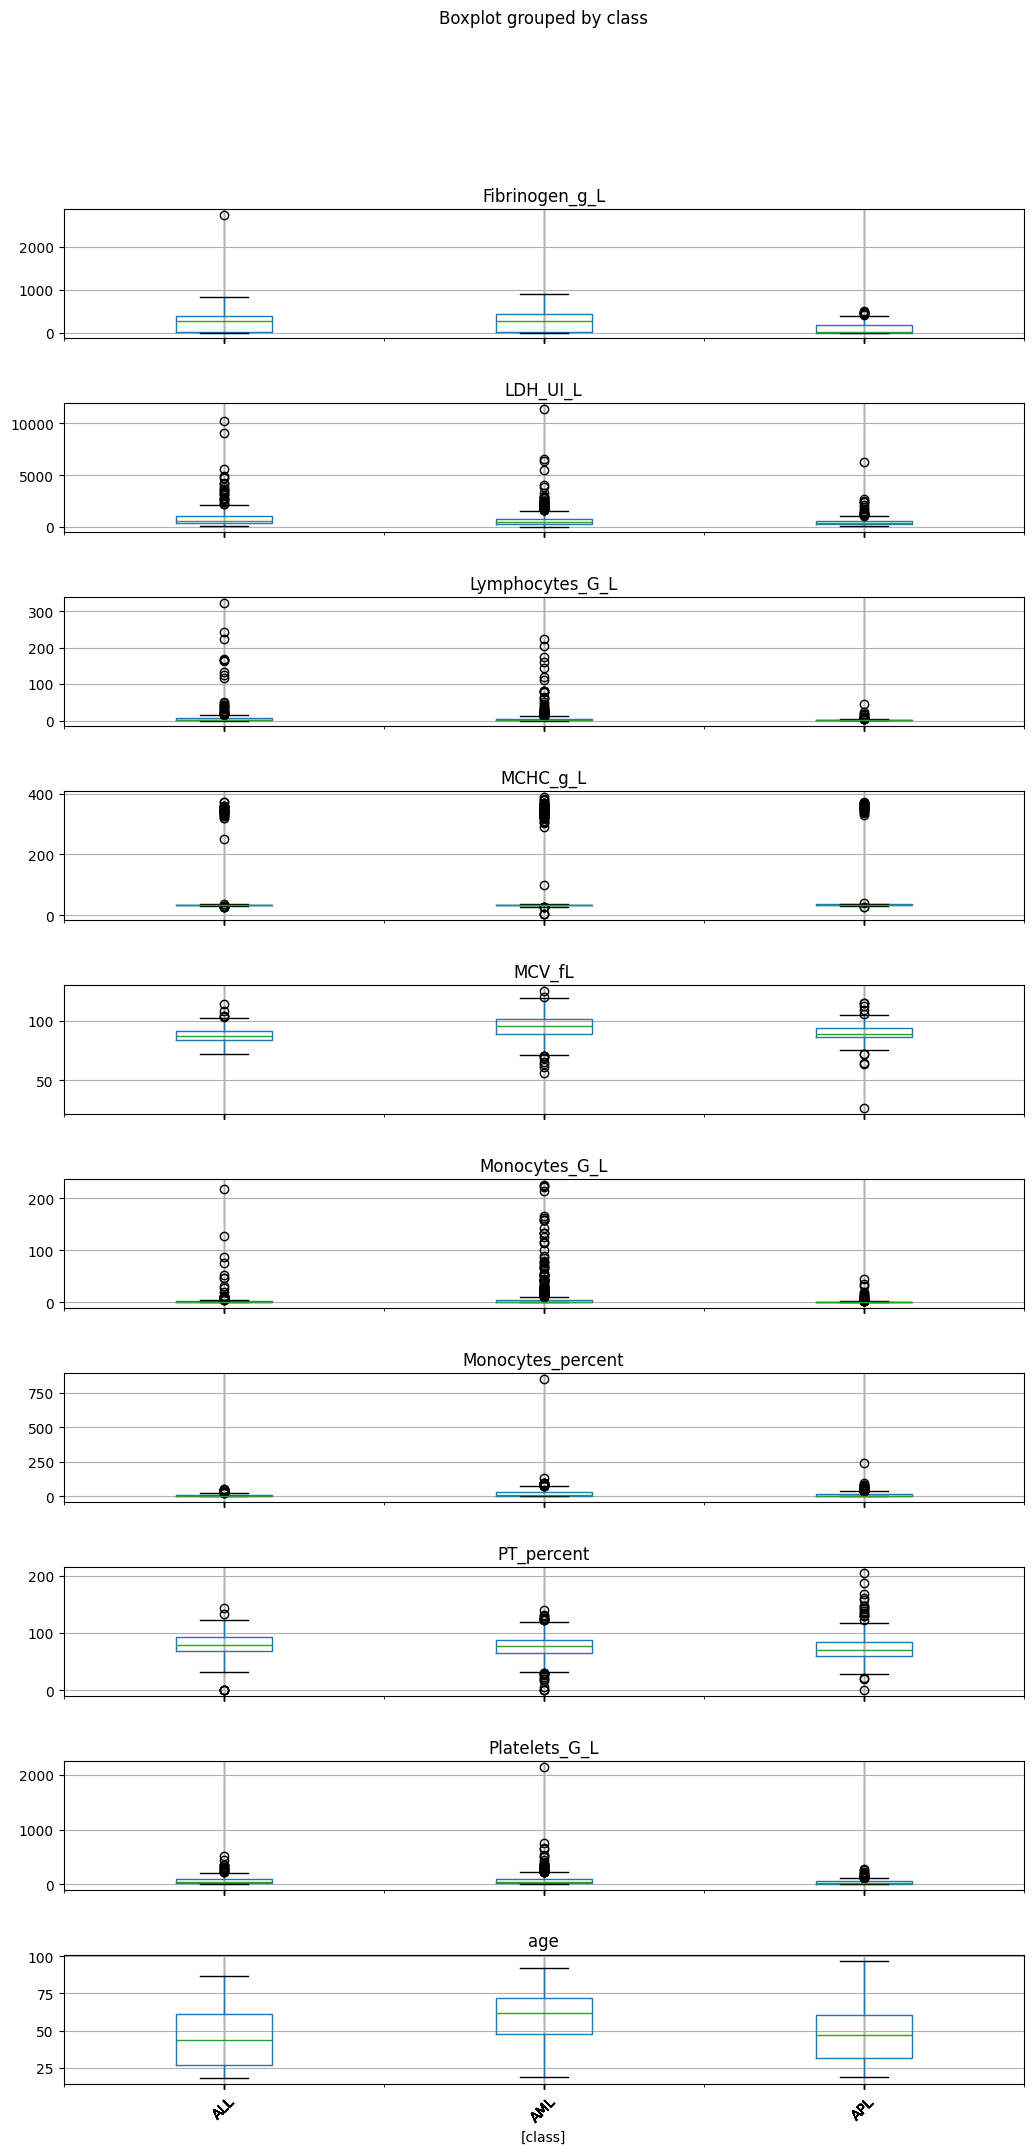

In [6]:
import matplotlib.pyplot as plt

df[features + ['class']].boxplot(by='class', figsize=(12, 25), layout=(len(features), 1), sharey=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5)

plt.show()